# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3, n_redundant=0,)
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

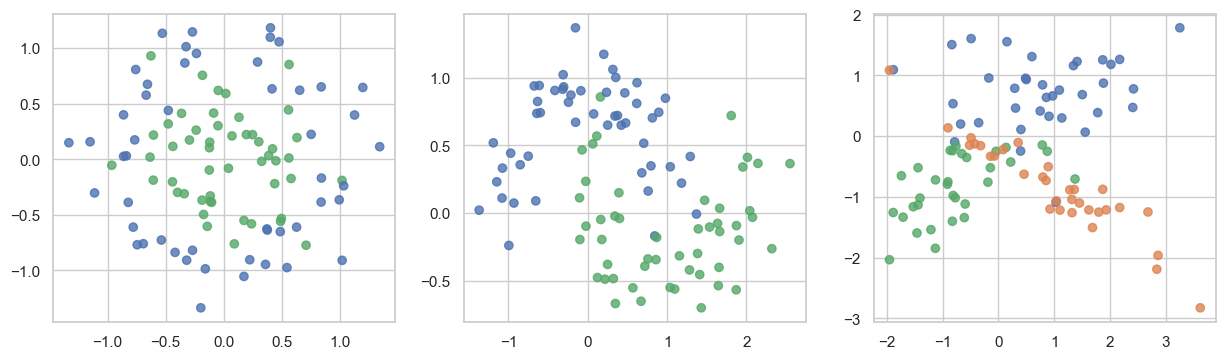

In [6]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

    plt.show()

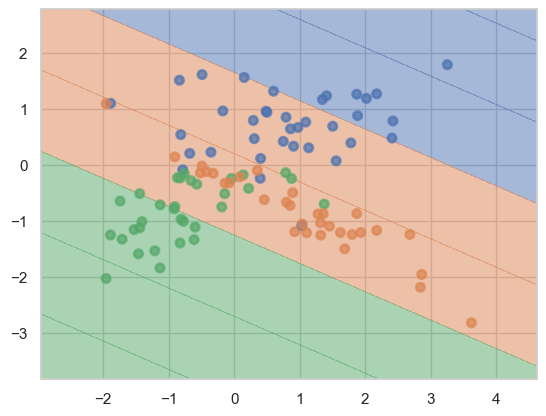

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Accuracy on train: 0.8800
Accuracy on test: 0.8000


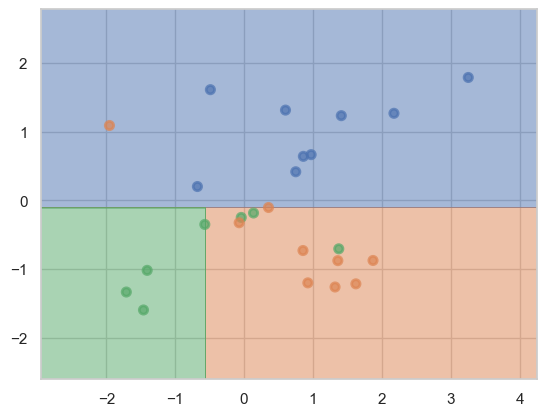

In [9]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)
dtc = DecisionTreeClassifier(min_samples_leaf=8).fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, dtc.predict(X_train))
accuracy_test = accuracy_score(y_test, dtc.predict(X_test))

print(f"Accuracy on train: {accuracy_train:.4f}")
print(f"Accuracy on test: {accuracy_test:.4f}")
plot_surface(dtc, X_test, y_test)

Ответ: Пиздец переобучились

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

Max depth: 2, min samples leaf: 1 train score: 0.89, validation score: 0.83, test score: 0.80


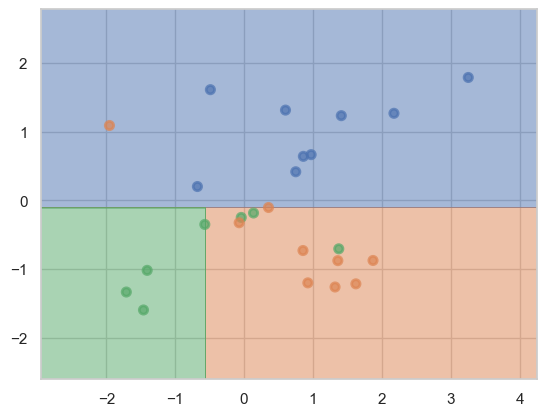

Max depth: 2, min samples leaf: 2 train score: 0.89, validation score: 0.83, test score: 0.80


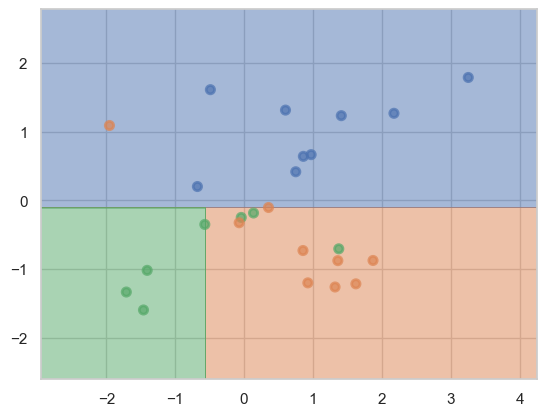

Max depth: 2, min samples leaf: 5 train score: 0.89, validation score: 0.83, test score: 0.80


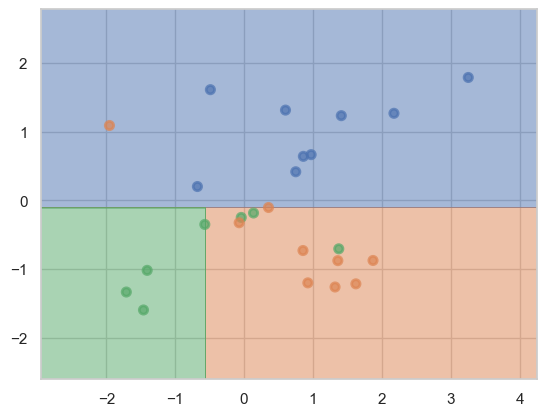

Max depth: 2, min samples leaf: 10 train score: 0.89, validation score: 0.83, test score: 0.80


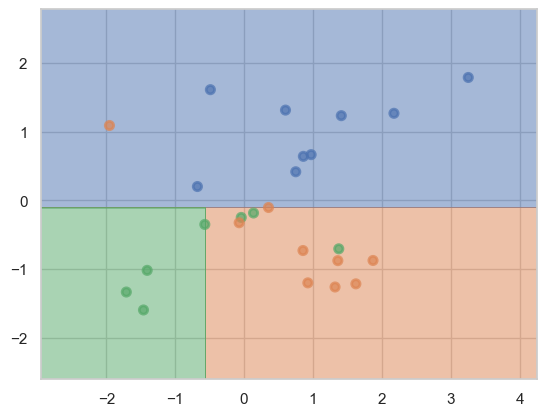

Max depth: 3, min samples leaf: 1 train score: 0.91, validation score: 0.79, test score: 0.80


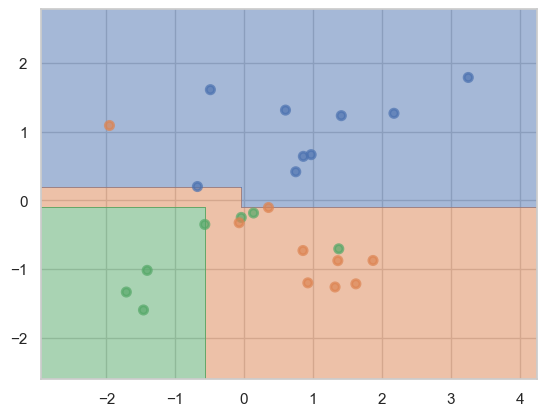

Max depth: 3, min samples leaf: 2 train score: 0.90, validation score: 0.85, test score: 0.80


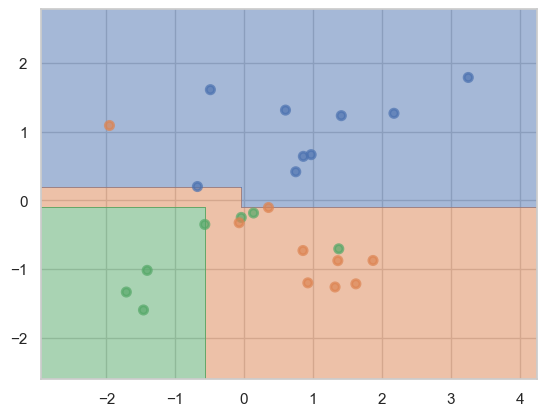

Max depth: 3, min samples leaf: 5 train score: 0.89, validation score: 0.81, test score: 0.80


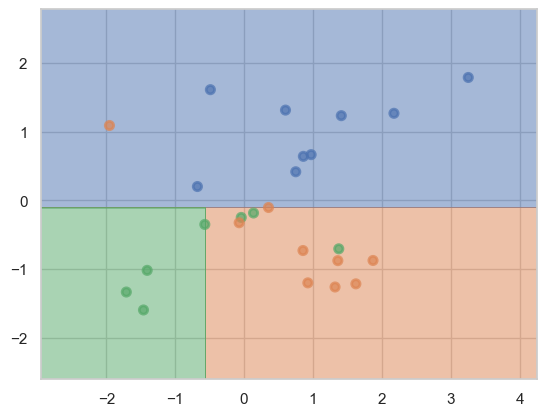

Max depth: 3, min samples leaf: 10 train score: 0.89, validation score: 0.83, test score: 0.80


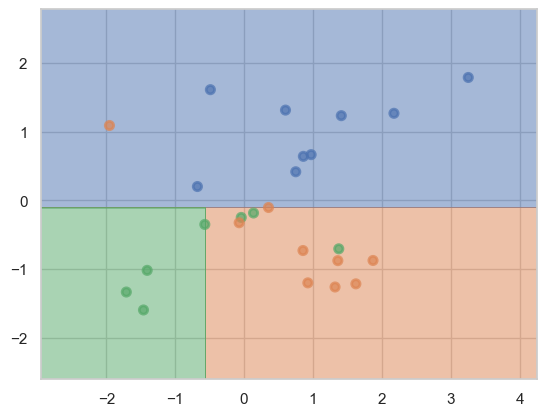

Max depth: 6, min samples leaf: 1 train score: 0.98, validation score: 0.76, test score: 0.80


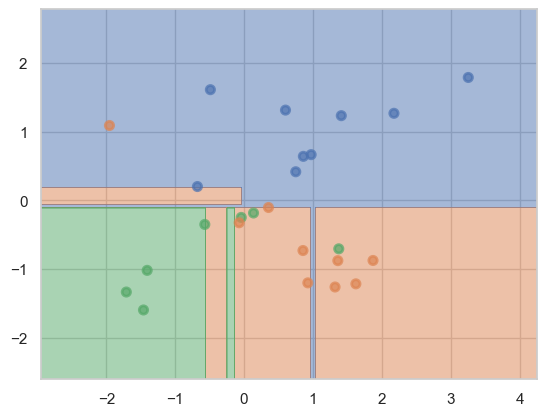

Max depth: 6, min samples leaf: 2 train score: 0.93, validation score: 0.84, test score: 0.84


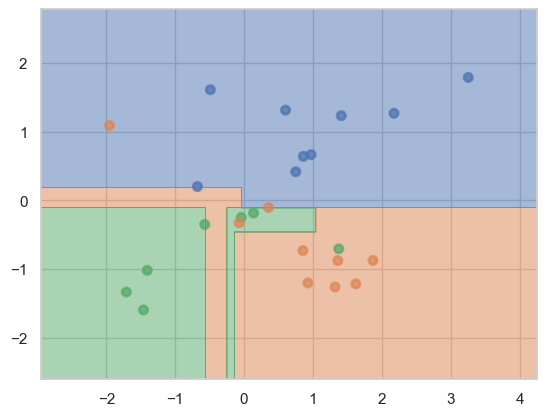

Max depth: 6, min samples leaf: 5 train score: 0.91, validation score: 0.75, test score: 0.80


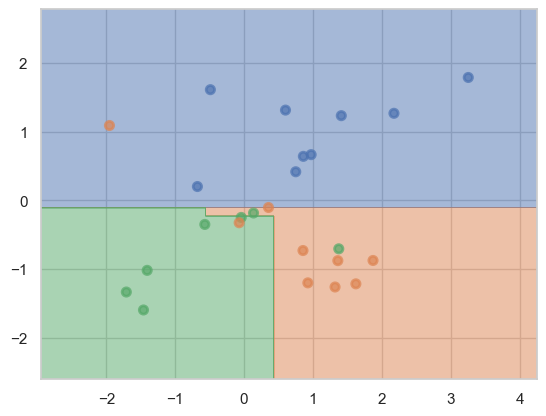

Max depth: 6, min samples leaf: 10 train score: 0.89, validation score: 0.83, test score: 0.80


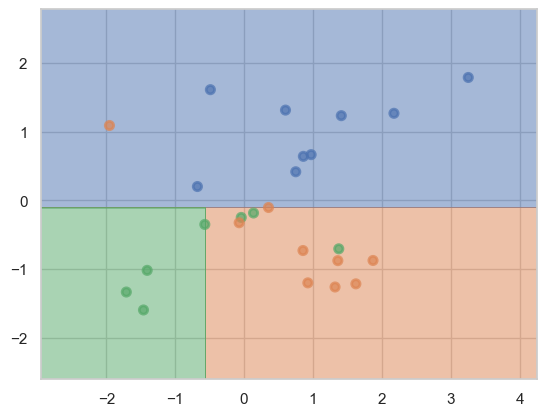

Max depth: None, min samples leaf: 1 train score: 1.00, validation score: 0.76, test score: 0.80


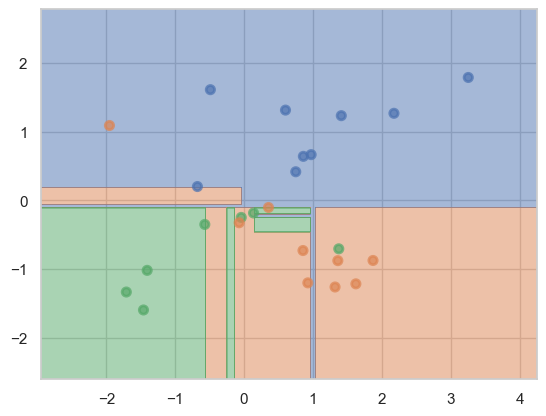

Max depth: None, min samples leaf: 2 train score: 0.93, validation score: 0.84, test score: 0.72


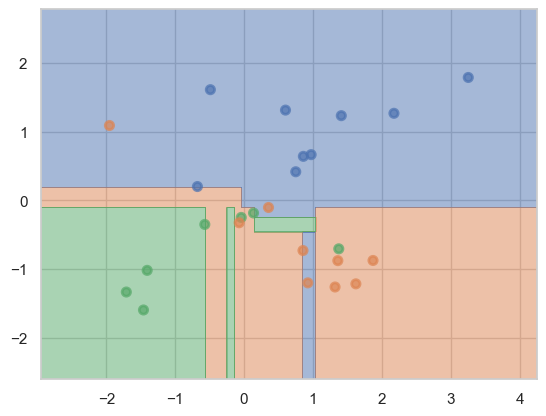

Max depth: None, min samples leaf: 5 train score: 0.91, validation score: 0.75, test score: 0.80


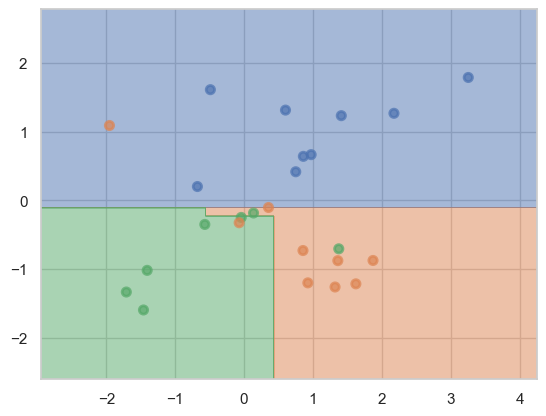

Max depth: None, min samples leaf: 10 train score: 0.89, validation score: 0.83, test score: 0.80


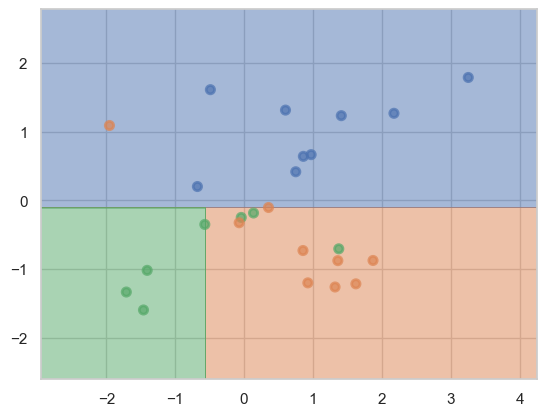

In [10]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'max_depth': [2, 3, 6, None],
    'min_samples_leaf': [1, 2, 5, 10]
}

dtc = DecisionTreeClassifier(random_state=42)
gs_dtc = GridSearchCV(dtc, parameter_grid, cv=5, scoring='accuracy', return_train_score=True, refit=True).fit(X_train, y_train)

test_score_best = 0
parameter_pair_best = None

for train_score, val_score, parameter_pair in\
    zip(gs_dtc.cv_results_['mean_train_score'], gs_dtc.cv_results_['mean_test_score'], gs_dtc.cv_results_['params']):

    dtc = DecisionTreeClassifier(**parameter_pair, random_state=42)
    test_score = accuracy_score(y_test, dtc.fit(X_train, y_train).predict(X_test))
        
    if test_score > test_score_best:
        test_score_best = test_score
        parameter_pair_best = parameter_pair
        
    print(f"Max depth: {parameter_pair['max_depth']}, min samples leaf: {parameter_pair['min_samples_leaf']} train score: {train_score:.2f}, validation score: {val_score:.2f}, test score: {test_score:.2f}")
    plot_surface(dtc, X_test, y_test)

In [11]:
print(f"Best estimator depth: {parameter_pair_best['max_depth']}, leaf samples: {parameter_pair_best['min_samples_leaf']}")
print(f"Best estimator accuracy: {test_score_best:.2f}")

Best estimator depth: 6, leaf samples: 2
Best estimator accuracy: 0.84


__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [12]:
#дан

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [13]:
# !curl -O https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [6]:
X = df.drop('UNS', axis=1)
y = df['UNS']

In [7]:
from hw5code import find_best_split

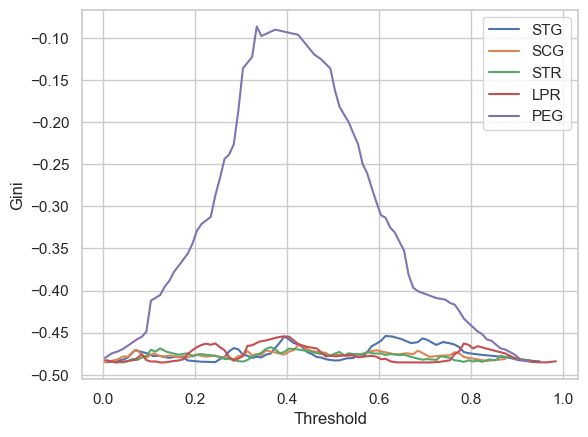

In [ ]:
for col in X.columns:
    thresholds, ginis, _, _ = find_best_split(X[col], y)
    plt.plot(thresholds, ginis, label=col)
    plt.xlabel('Threshold')
    plt.ylabel('Gini')
    plt.legend()

Text(0.5, 0.98, 'Feature - Class')

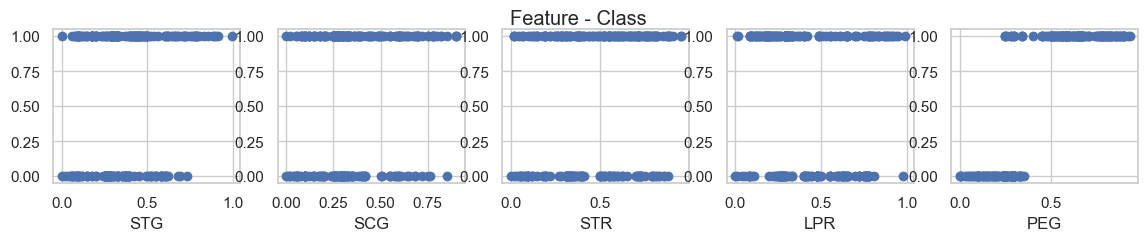

In [9]:
fig, plots = plt.subplots(1, 5, figsize=(14,2))
for i, col in enumerate(X.columns):
    plots[i].scatter(X[col], y, label=col)
    plots[i].set_xlabel(col)
    # plots[i].set_ylabel('Class')

fig.suptitle('Feature - Class')

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

In [10]:
# чекни графики сам поймешь, PEG хорошо делит признаки

**Ответ:**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('agaricus-lepiota.data')

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for feature in df_encoded.columns:
    df_encoded[feature] = LabelEncoder().fit_transform(df_encoded[feature])

X = df_encoded.drop('p', axis=1)
y = df_encoded['p']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, stratify=y)

In [ ]:
from hw5code import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
accuracy_test = accuracy_score(y_test, dtc.predict(X_test))
print(f"Custom decision tree test accuracy: {accuracy_test:.2f}")

Custom decision tree test accuracy: 0.96


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [24]:
df = pd.read_csv('tic-tac-toe-endgame.csv')

df_encoded = df.copy()
for feature in df_encoded.columns:
    df_encoded[feature] = LabelEncoder().fit_transform(df_encoded[feature])

X = df_encoded.drop('V10', axis=1)
y = df_encoded['V10']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, stratify=y)

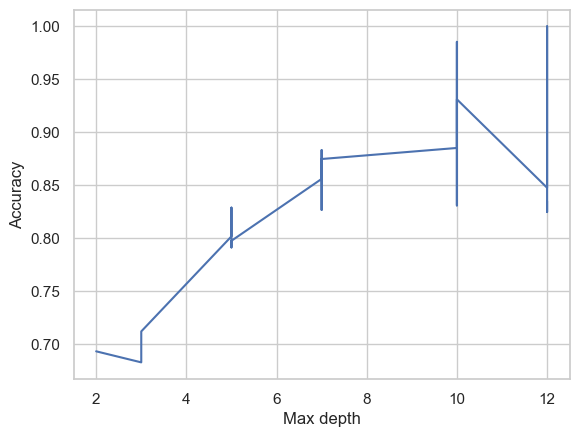

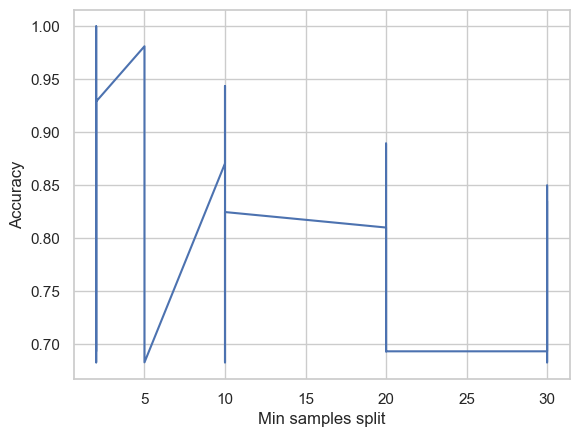

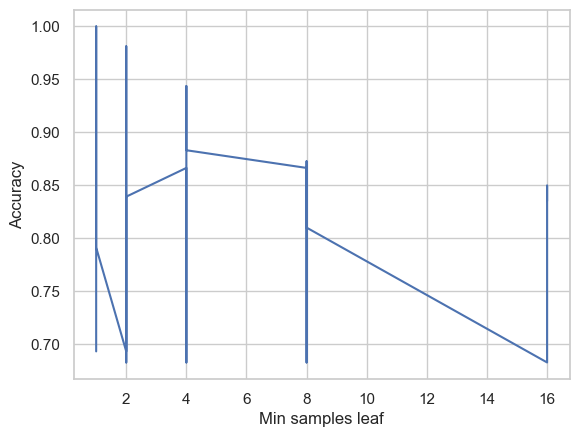

Best estimator depth: 12, min samples split: 2, min samples leaf: 1
Best estimator accuracy: 1.00


In [45]:
test_score_best = 0
max_depth_best = None
min_samples_split_best = None
min_samples_leaf_best = None
estimator_best = None
scores_test = []

for max_depth in [2, 3, 5, 7, 10, 12]:
    for min_samples_split in [2, 5, 10, 20, 30]:
        for min_samples_leaf in [1, 2, 4, 8, 16]:
            dtc = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            ).fit(X, y)
            accuracy_test = accuracy_score(y_test, dtc.predict(X_test))
            
            if accuracy_test > test_score_best:
                test_score_best = accuracy_test
                max_depth_best = max_depth
                min_samples_split_best = min_samples_split
                min_samples_leaf_best = min_samples_leaf
            scores_test.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'estimator_best': dtc,
                'accuracy_test': accuracy_test
            })

df_scores = pd.DataFrame(scores_test).sort_values('max_depth')
plt.plot(df_scores['max_depth'], df_scores['accuracy_test'], label='Test accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()
df_scores = df_scores.sort_values('min_samples_split')
plt.plot(df_scores['min_samples_split'], df_scores['accuracy_test'], label='Test accuracy')
plt.xlabel('Min samples split')
plt.ylabel('Accuracy')
plt.show()
df_scores = df_scores.sort_values('min_samples_leaf')
plt.plot(df_scores['min_samples_leaf'], df_scores['accuracy_test'], label='Test accuracy')
plt.xlabel('Min samples leaf')
plt.ylabel('Accuracy')
plt.show()

print(f"Best estimator depth: {max_depth_best}, min samples split: {min_samples_split_best}, min samples leaf: {min_samples_leaf_best}")
print(f"Best estimator accuracy: {test_score_best:.2f}")

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [3]:
from sklearn.datasets._california_housing import fetch_california_housing

df = fetch_california_housing()

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X = pd.DataFrame(df.data)
y = pd.Series(df.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, random_state=42)

In [6]:
from hw5code import LinearRegressionTree
from sklearn.metrics import mean_squared_error

lrt = LinearRegressionTree(max_depth=5, min_samples_leaf=3, bins=10, encode=False).fit(X_train, y_train)
predictions_test = lrt.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)

print(f"Custom decision tree test MSE: {mse_test:.2f}")

Custom decision tree test MSE: 1.44


In [ ]:
from datetime import datetime

test_score_best = np.inf
max_depth_best = None
min_samples_split_best = None
min_samples_leaf_best = None
estimator_best = None
scores_test = []

for max_depth in [2, 4, 6]:
    for min_samples_split in [4, 16, 64]:
        for min_samples_leaf in [2, 8, 32]:

            start = datetime.now()

            lrt = LinearRegressionTree(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                bins=5
            ).fit(X, y)
            mse_test = mean_squared_error(y_test, lrt.predict(X_test))
            
            if mse_test < test_score_best:
                test_score_best = mse_test
                max_depth_best = max_depth
                min_samples_split_best = min_samples_split
                min_samples_leaf_best = min_samples_leaf
            scores_test.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'estimator_best': lrt,
                'mse_test': mse_test
            })

            duration = (datetime.now() - start).total_seconds()
            print(f"{len(scores_test)}. Max depth: {max_depth}, min samples split: {min_samples_split}, min samples leaf: {min_samples_leaf}, duration: {duration:.1f} sec, test MSE: {mse_test:.2f}")

1. Max depth: 2, min samples split: 4, min samples leaf: 2, duration: 10.1 sec, test MSE: 0.39
2. Max depth: 2, min samples split: 4, min samples leaf: 8, duration: 10.1 sec, test MSE: 0.39
3. Max depth: 2, min samples split: 4, min samples leaf: 32, duration: 10.0 sec, test MSE: 0.39
4. Max depth: 2, min samples split: 16, min samples leaf: 2, duration: 10.0 sec, test MSE: 0.39
5. Max depth: 2, min samples split: 16, min samples leaf: 8, duration: 9.9 sec, test MSE: 0.39
6. Max depth: 2, min samples split: 16, min samples leaf: 32, duration: 10.0 sec, test MSE: 0.39
7. Max depth: 2, min samples split: 64, min samples leaf: 2, duration: 10.1 sec, test MSE: 0.39
8. Max depth: 2, min samples split: 64, min samples leaf: 8, duration: 10.1 sec, test MSE: 0.39
9. Max depth: 2, min samples split: 64, min samples leaf: 32, duration: 10.3 sec, test MSE: 0.39
10. Max depth: 4, min samples split: 4, min samples leaf: 2, duration: 19.3 sec, test MSE: 0.34
11. Max depth: 4, min samples split: 4, m

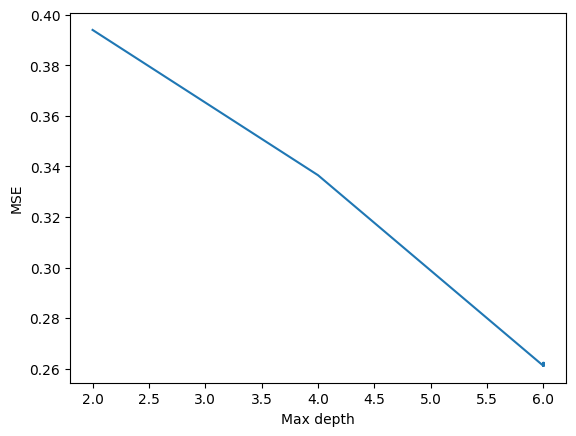

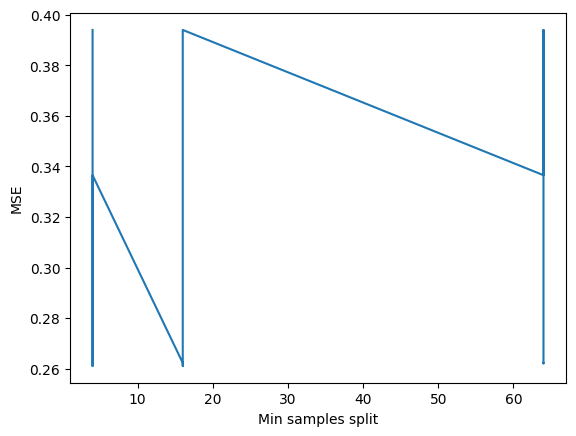

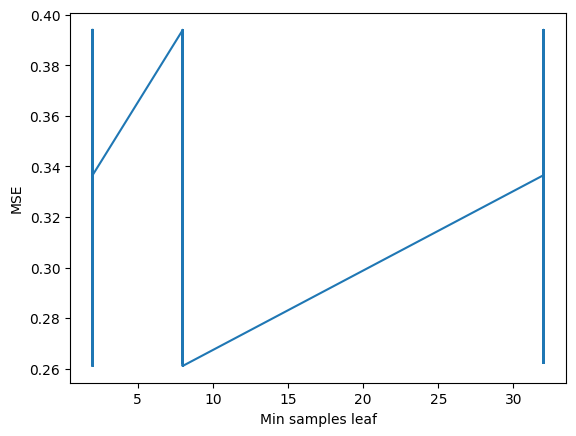

In [12]:
import matplotlib.pyplot as plt

df_scores = pd.DataFrame(scores_test).sort_values('max_depth')
plt.plot(df_scores['max_depth'], df_scores['mse_test'], label='Test MSE')
plt.xlabel('Max depth')
plt.ylabel('MSE')
plt.show()
df_scores = df_scores.sort_values('min_samples_split')
plt.plot(df_scores['min_samples_split'], df_scores['mse_test'], label='Test MSE')
plt.xlabel('Min samples split')
plt.ylabel('MSE')
plt.show()
df_scores = df_scores.sort_values('min_samples_leaf')
plt.plot(df_scores['min_samples_leaf'], df_scores['mse_test'], label='Test MSE')
plt.xlabel('Min samples leaf')
plt.ylabel('MSE')
plt.show()

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [22]:
n_samples = 3_000
X = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)

X = pd.DataFrame(X)
y = pd.Series(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

Custom decision tree test MSE: 0.03


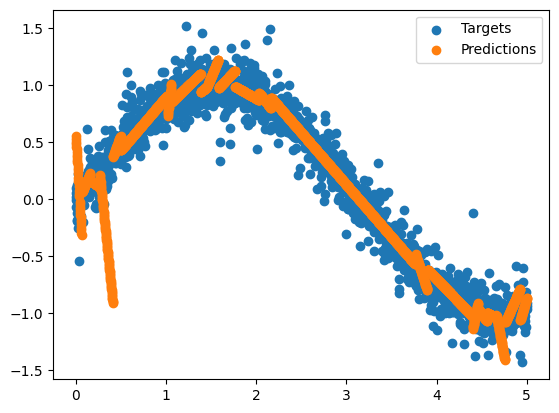

In [29]:
lrt = LinearRegressionTree(max_depth=5, min_samples_leaf=3, bins=10, encode=False).fit(X_train, y_train)
predictions_test = lrt.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print(f"Custom decision tree test MSE: {mse_test:.2f}")
plt.scatter(X_test, y_test, label='Targets')
plt.scatter(X_test, predictions_test, label='Predictions')
plt.legend()
plt.show()

Custom decision tree test MSE: 0.02


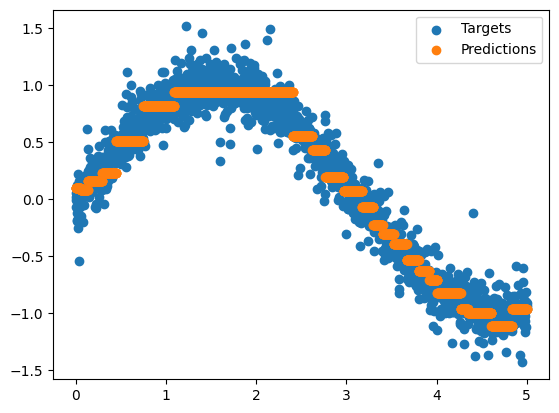

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3).fit(X_train, y_train)
predictions_test = dtr.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print(f"Custom decision tree test MSE: {mse_test:.2f}")
plt.scatter(X_test, y_test, label='Targets')
plt.scatter(X_test, predictions_test, label='Predictions')
plt.legend()
plt.show()

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
#мне не понравилось это делать, но было полезно, надеюсь